# Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspect
of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

# Tasks
1.Find the linear regression equation for this data.

2.Chart the original data and the equation on the chart.

3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

# Data Cleaning

In [3]:
df.shape

(15, 2)

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [7]:
df = df.drop_duplicates()

In [8]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

# EDA

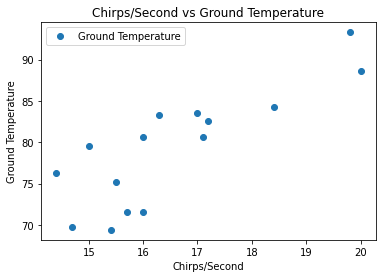

In [9]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [10]:
df[['Chirps/Second','Ground Temperature']].corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


# **Question-5**

# Splitting

In [11]:
from sklearn.linear_model import LinearRegression
X = df[['Ground Temperature']].values #array of features
y = df['Chirps/Second'].values #array of targets

# Model Training

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [13]:
regressor.coef_

array([0.20299973])

In [14]:
regressor.intercept_

0.45931464523595267

In [15]:
y_pred = regressor.predict(X)
y_pred

array([18.44509085, 14.99409541, 19.39918959, 17.572192  , 16.821093  ,
       15.72489445, 14.60839592, 14.99409541, 14.547496  , 17.36919227,
       16.61809327, 17.22709246, 16.821093  , 17.40979222, 15.94819415])

# **1.Find the linear regression equation for this data.**

In [16]:
print("regressor.intercept:",regressor.intercept_) # c
print("regressor.coef",regressor.coef_)
print(f"Linear Regression Equation y_pred = ({regressor.coef_} * Ground Temperature) + {regressor.intercept_} ")

regressor.intercept: 0.45931464523595267
regressor.coef [0.20299973]
Linear Regression Equation y_pred = ([0.20299973] * Ground Temperature) + 0.45931464523595267 


# **2.Chart the original data and the equation on the chart.**

In [17]:
df_1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df_1

,Actual,Predicted
0,20.0,18.445091
1,16.0,14.994095
2,19.8,19.399190
3,18.4,17.572192
4,17.1,16.821093
5,15.5,15.724894
6,14.7,14.608396
7,15.7,14.994095
8,15.4,14.547496
9,16.3,17.369192


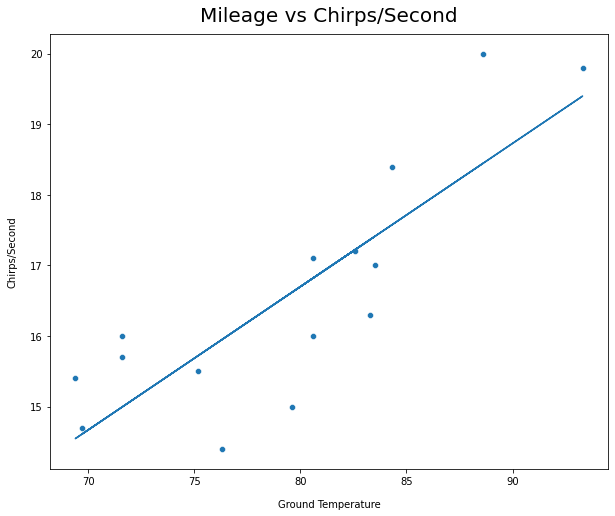

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Ground Temperature', y='Chirps/Second', data=df)
plt.title("Mileage vs Chirps/Second", y=1.015, fontsize=20)
plt.xlabel("Ground Temperature", labelpad=13)
plt.ylabel("Chirps/Second", labelpad=13)
ax = plt.gca()
plt.plot(X,regressor.predict(X))

# **3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [19]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529146998


# **4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [20]:
regressor.predict([[95]])

array([19.74428913])

# **5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

In [21]:
#y=m*x + c from this x= y-c / m
x=18-regressor.intercept_
x/regressor.coef_

array([86.40743135])